# **1. Download Dataset**


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d subhajournal/phishingemails

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


#**2. Import necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# **3. Load the dataset**

In [ ]:
df = pd.read_csv(r'/content/Phishing_Email.csv')
df.head() #view fast five rows only

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


# **4. Text Preprocessing**

In [ ]:
#checking null values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


**There are 16 rows available that have null values .Let's remove these rows**

## **4.1 Drop duplicate and null values**

In [ ]:
#drop the duplicate and null values

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [ ]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


## **4.2 checking the balance of the dataset**

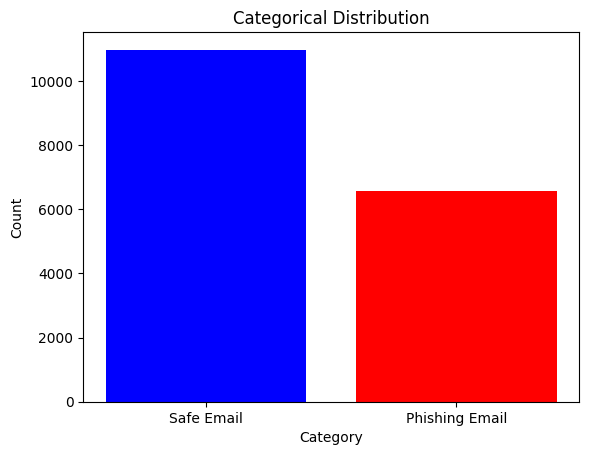

In [ ]:
#checking the balance of the dataset

index = df['Email Type'].value_counts().index
values = df['Email Type'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## **4.3 Integer Encoding**

In [ ]:
#convert the categorical label into numerical
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type']) ### 0 denotes pishing and 1 denotes safe

## **4.4 Remove hyperlinks, punctuations, extra space**

In [ ]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Email Text"] =df["Email Text"].apply(preprocess_text)


In [ ]:
#final overview

df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


# **Wordcloud**
## **wordcloud of available stopwords**

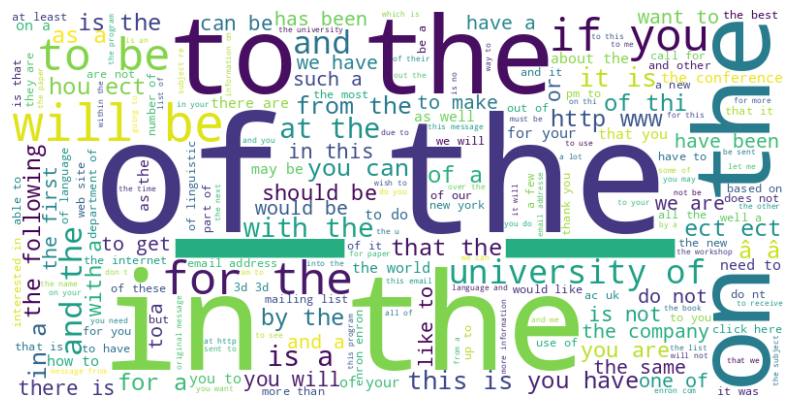

In [ ]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## **wordcloude of unique words**

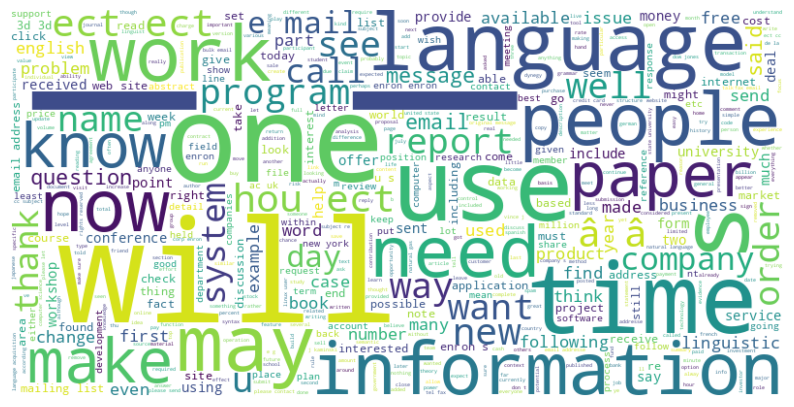

In [ ]:

#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **4.5 converting text into vector**
## **4.5.1 Tfidf Vectorizer**

In [ ]:
# passing object
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
feature_x = tf.fit_transform(df['Email Text']).toarray()

In [ ]:
y_tf = np.array(df['Email Type']) # convert the label into numpy array

## **4.5.2 Split into train and test set**

In [ ]:
X_tr,X_tst,y_tr,y_tst = train_test_split(feature_x,y_tf,test_size=0.2,random_state=0)

# **5 Applying different algorithm**
## **5.1 Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_tr,y_tr)

MultinomialNB()

accuracy from native bayes: 97.52 %
f1 score from naive bayes: 97.99 %
classification report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.98      0.98      0.98      3508



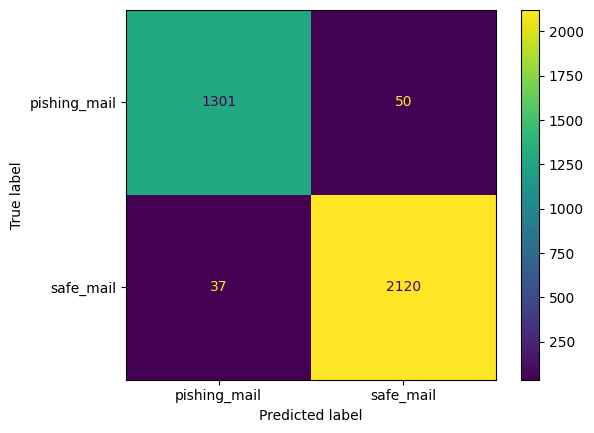

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pred_nav = nb.predict(X_tst)

# Checking the performance

print(f"accuracy from native bayes: {accuracy_score(y_tst,pred_nav)*100:.2f} %")
print(f"f1 score from naive bayes: {f1_score(y_tst,pred_nav)*100:.2f} %")
print("classification report :\n\n",classification_report(y_tst,pred_nav))

#confusion matrix
clf_nav = confusion_matrix(y_tst,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## **5.2 Logistic Regression**


accuracy from logistic regression:97.98 %
f1 score from logistic regression: 98.36 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1351
           1       0.98      0.99      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



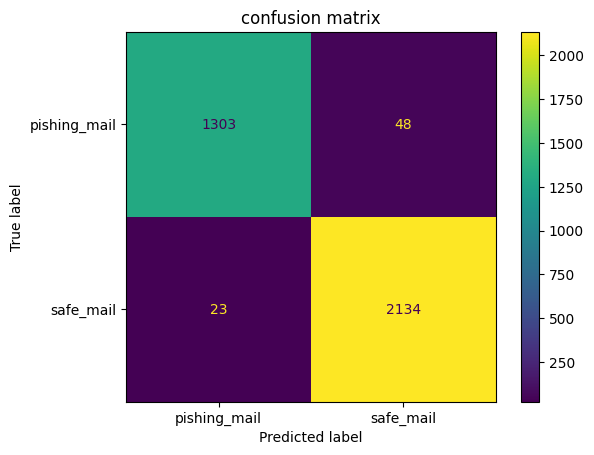

In [ ]:
# passing object
lg = LogisticRegression()
lg.fit(X_tr,y_tr)

# prediction
pred_lg = lg.predict(X_tst)
# performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_tst,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_tst,pred_lg)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_lg))

clf_lg = confusion_matrix(y_tst,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

In [ ]:
# save the model for future use

import joblib

# Save the trained model to a file
joblib.dump(nb, 'email_spam_nb.pkl')


['email_spam_nb.pkl']

# **SGDClassifier**

accuracy from logistic regression:98.38 %
f1 score from logistic regression: 98.68 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1351
           1       0.98      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



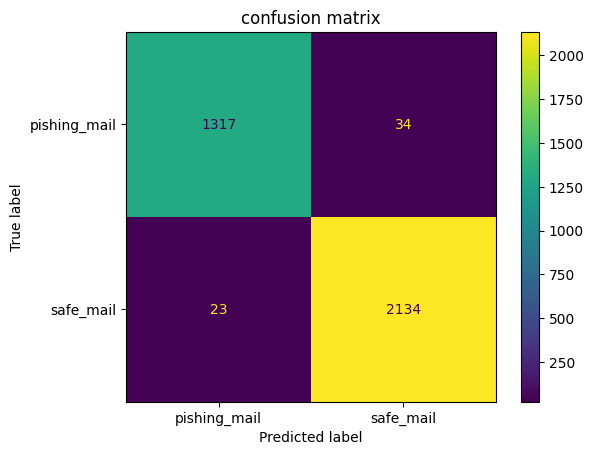

In [ ]:
from sklearn.linear_model import SGDClassifier

# passing object
sgd = SGDClassifier()
sgd.fit(X_tr,y_tr)

# prediction
pred_sgd = sgd.predict(X_tst)
# performance
print(f"accuracy from logistic regression:{accuracy_score(y_tst,pred_sgd)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_tst,pred_sgd)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_sgd))

clf_sgd = confusion_matrix(y_tst,pred_sgd)
cx_ = ConfusionMatrixDisplay(clf_sgd,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.3 XGBoost**

accuracy from XGB:97.04 %
f1 score from XGB: 97.58 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1351
           1       0.98      0.97      0.98      2157

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



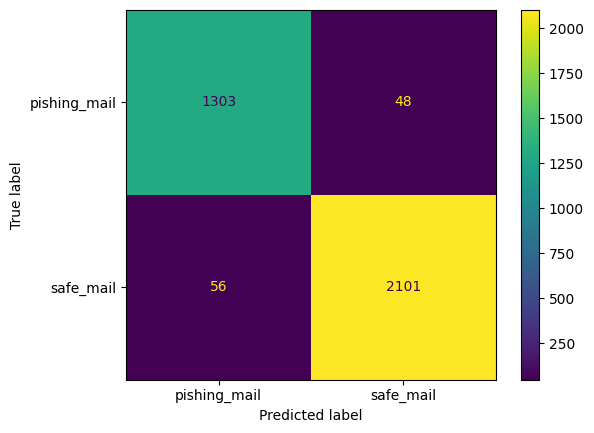

In [ ]:
# applying boosting algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_tr,y_tr)

#prediction
pred_xgb = xgb.predict(X_tst)

#performance
print(f"accuracy from XGB:{accuracy_score(y_tst,pred_xgb)*100:.2f} %")
print(f"f1 score from XGB: {f1_score(y_tst,pred_xgb)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_xgb))

#confusion matrix
clf_xgb = confusion_matrix(y_tst,pred_xgb)
cx_ = ConfusionMatrixDisplay(clf_xgb,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## **5.4 Decision Tree**

accuracy from Decision Tree:92.96 %
f1 score from Decision Tree: 94.25 %
classification report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1351
           1       0.95      0.94      0.94      2157

    accuracy                           0.93      3508
   macro avg       0.92      0.93      0.93      3508
weighted avg       0.93      0.93      0.93      3508



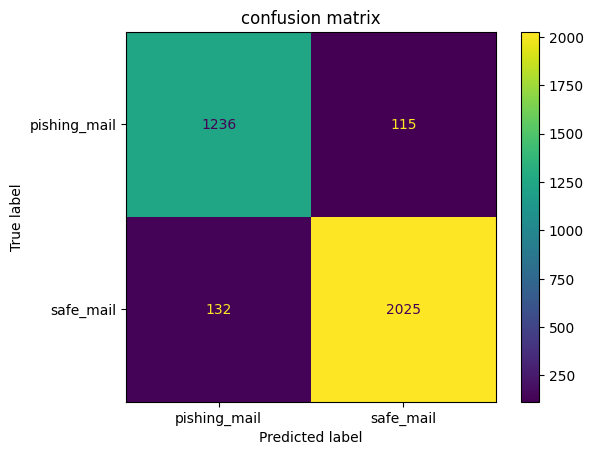

In [ ]:
dtr = DecisionTreeClassifier() #passing object
dtr.fit(X_tr,y_tr)

#prediction
pred_dtr = dtr.predict(X_tst)

#performance
print(f"accuracy from Decision Tree:{accuracy_score(y_tst,pred_dtr)*100:.2f} %")
print(f"f1 score from Decision Tree: {f1_score(y_tst,pred_dtr)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_dtr))

#confusion matrix
clf_dtr = confusion_matrix(y_tst,pred_dtr)
cx_ = ConfusionMatrixDisplay(clf_dtr,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.5 Random Forest**

accuracy from rnadom forest:97.69 %
f1 score from random forest: 98.11 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.99      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



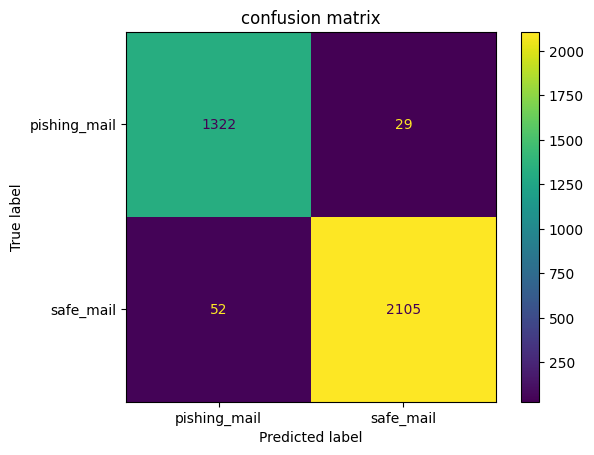

In [ ]:
rnf = RandomForestClassifier() #passing object
rnf.fit(X_tr,y_tr)

#prediction
pred_rnf = rnf.predict(X_tst)

#performance
print(f"accuracy from rnadom forest:{accuracy_score(y_tst,pred_rnf)*100:.2f} %")
print(f"f1 score from random forest: {f1_score(y_tst,pred_rnf)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_rnf))

#confusion matrix
clf_rnf = confusion_matrix(y_tst,pred_rnf)
cx_ = ConfusionMatrixDisplay(clf_rnf,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.6 MLP Classifier**

accuracy from MLP:98.38 %
f1 score from MLP: 98.68 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



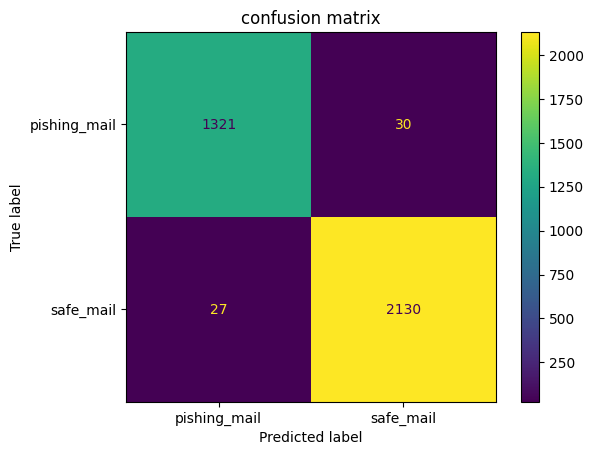

In [ ]:
mlp = MLPClassifier()  # passing object
mlp.fit(X_tr,y_tr)

#prediction
pred_mlp = mlp.predict(X_tst)

#performance
print(f"accuracy from MLP:{accuracy_score(y_tst,pred_mlp)*100:.2f} %")
print(f"f1 score from MLP: {f1_score(y_tst,pred_mlp)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_mlp))

#confusion matrix
clf_mlp = confusion_matrix(y_tst,pred_mlp)
cx_ = ConfusionMatrixDisplay(clf_mlp,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.7 EDA comparison of the models performances**

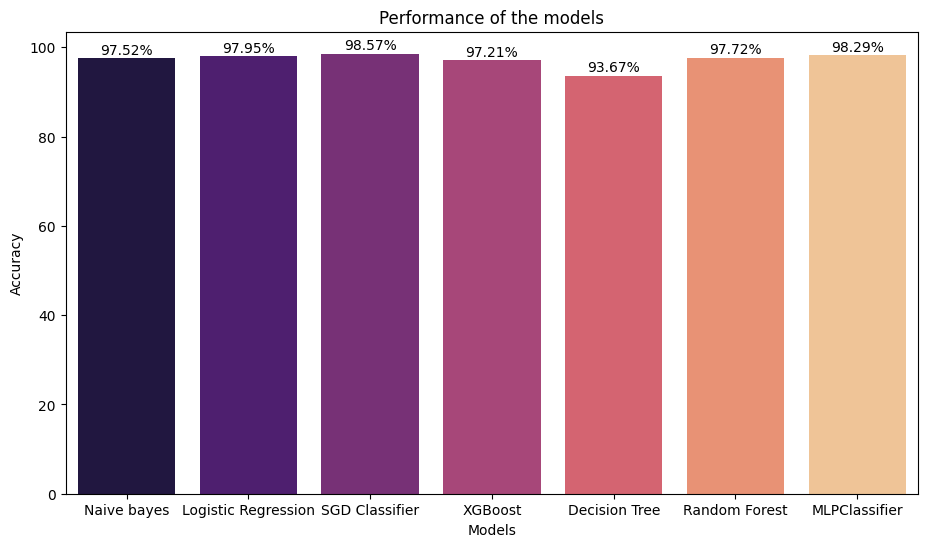

In [ ]:
import plotly.express as px
models = ['Naive bayes','Logistic Regression','SGD Classifier','XGBoost','Decision Tree','Random Forest','MLPClassifier']
accuracies = [97.52,97.95,98.57,97.21,93.67,97.72,98.29]
plt.figure(figsize=(11,6))

#create bar plot
ax = sns.barplot(x=models,y=accuracies,palette='magma')

#add annotation above each bar
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.2, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Performance of the models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# **6 Neural Network**

In [ ]:
max_len = 150 #Fixed the length of each vector

tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [ ]:
len(vector)

17538

In [ ]:
#convert feature vector and label into array
X = np.array(vector)
y = np.array(df['Email Type'])

In [ ]:
#Split the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

# **SimpleRNN**

In [ ]:
model_smp = Sequential() # Sequential() API
model_smp.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.5))
model_smp .add(Dense(1, activation='sigmoid'))

In [ ]:
model_smp.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_smp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historical_smp  = model_smp.fit(x_train,y_train, epochs=7, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.5725 - loss: 0.7072 - val_accuracy: 0.6340 - val_loss: 0.6322
Epoch 2/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6638 - loss: 0.5959 - val_accuracy: 0.6993 - val_loss: 0.5279
Epoch 3/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7249 - loss: 0.5145 - val_accuracy: 0.7166 - val_loss: 0.4989
Epoch 4/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7464 - loss: 0.4290 - val_accuracy: 0.6702 - val_loss: 0.4722
Epoch 5/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7559 - loss: 0.3993 - val_accuracy: 0.7309 - val_loss: 0.4662
Epoch 6/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8394 - loss: 0.3189 - val_accuracy: 0.7087 - val_loss: 0.4998
Epoch 7/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7880 - loss: 0.3926 - val_accuracy: 0.7329 - val_loss: 0.4659


Text(0, 0.5, 'Loss')

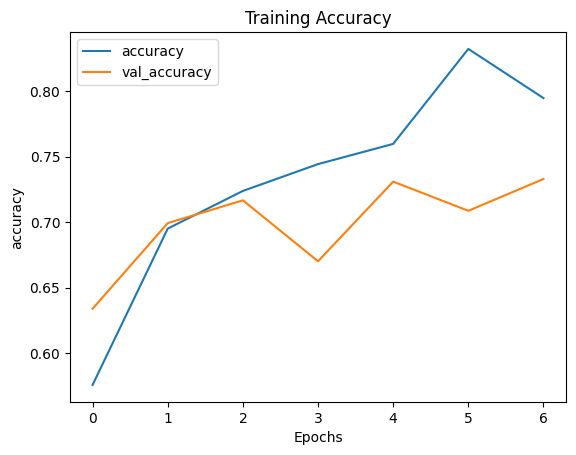

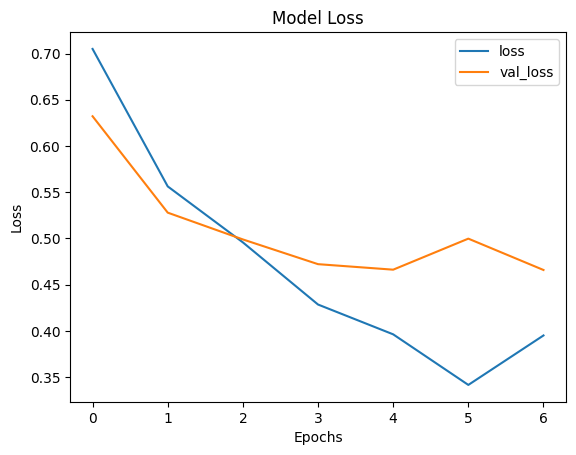

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(historical_smp.history)

pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


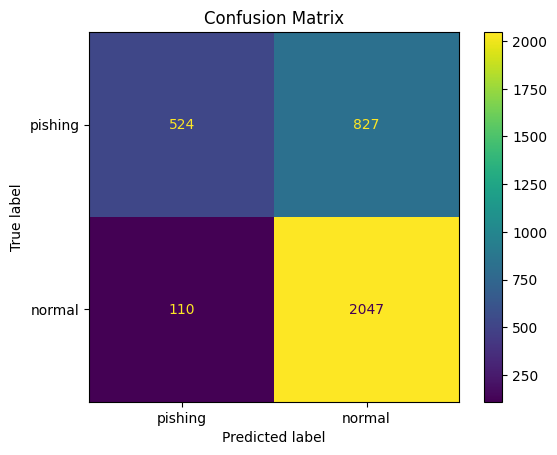

In [ ]:
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_smp = confusion_matrix(y_test,y_pred_smp)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp,display_labels=['pishing','normal']).plot()
plt.title("Confusion Matrix")
plt.show()


# **6.1 LSTM Architecture**

In [ ]:
model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6990 - loss: 0.5523 - val_accuracy: 0.9284 - val_loss: 0.2305
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9256 - loss: 0.2350 - val_accuracy: 0.9333 - val_loss: 0.2219
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9520 - loss: 0.1752 - val_accuracy: 0.9401 - val_loss: 0.2004
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9553 - loss: 0.1565 - val_accuracy: 0.9102 - val_loss: 0.2295
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9742 - loss: 0.0773 - val_accuracy: 0.9621 - val_loss: 0.1299


# **Performance**

In [ ]:
results = model.evaluate(x_test, y_test)
loss = results[0]  # Extract the loss from the results
accuracy = results[1]  # Extract the accuracy from the results

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9677 - loss: 0.1133
Model Loss: 0.12986735999584198
Model Accuracy: 96.20866775512695


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(0, 0.5, 'Loss')

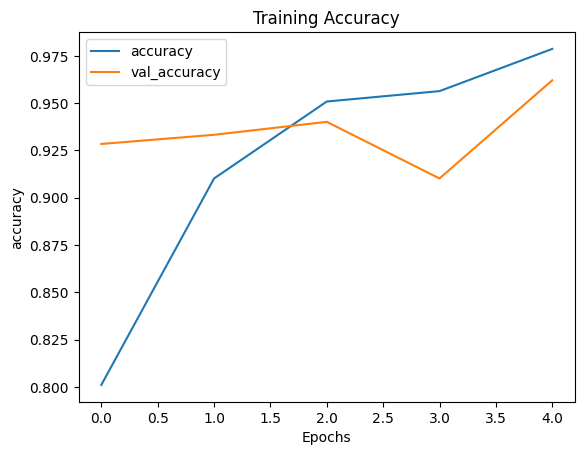

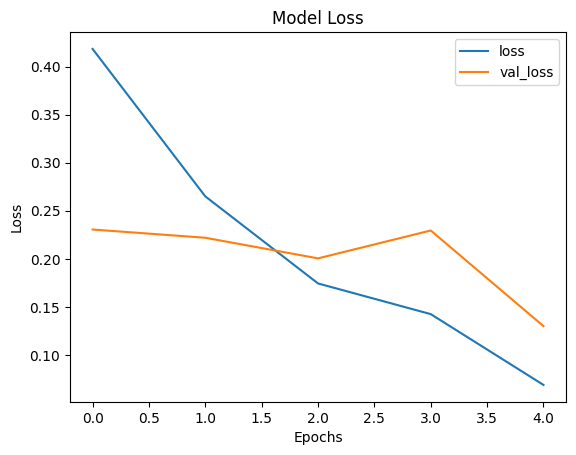

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

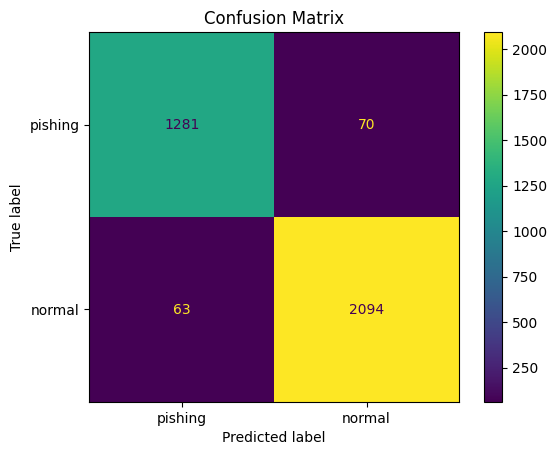

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf = confusion_matrix(y_test,y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['pishing','normal'])
ax.plot()
plt.title("Confusion Matrix")
plt.show()

# **Bidirectional**

In [ ]:
model_bi = Sequential() # Sequential() API
model_bi.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_bi.add(Bidirectional(LSTM(units=100)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(1, activation='sigmoid'))

In [ ]:
model_bi.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_bi.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historical  = model_bi.fit(x_train,y_train, epochs=2, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/2
877/877 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.8597 - loss: 0.3310 - val_accuracy: 0.9672 - val_loss: 0.1004
Epoch 2/2
877/877 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9768 - loss: 0.0714 - val_accuracy: 0.9709 - val_loss: 0.1050


In [ ]:
model_bi.evaluate(x_test,y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9742 - loss: 0.0942


[0.10503736883401871, 0.9709236025810242]

In [ ]:
y_pred_prob_bi = model_bi.predict(x_test)
y_pred_bi = (y_pred_prob_bi > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


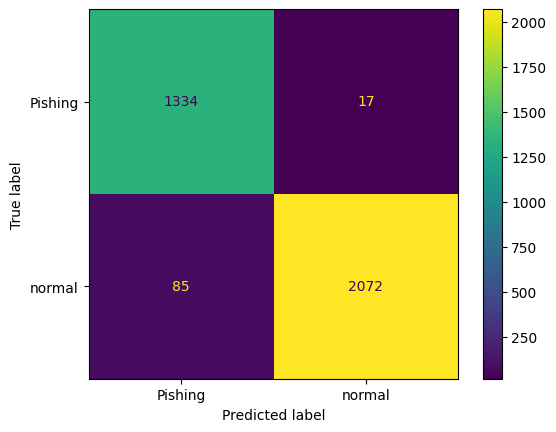

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_bi = confusion_matrix(y_test,y_pred_bi)
ax_bi = ConfusionMatrixDisplay(confusion_matrix=cnf_bi,display_labels=['Pishing','normal'])
ax_bi.plot()
plt.show()

# **Gated Recurrent Unit**

In [ ]:
model_gru = Sequential() # Sequential() API
model_gru.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_gru.add(GRU(units=100))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

In [ ]:
model_gru.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_gru.fit(x_train,y_train, epochs=3, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6898 - loss: 0.5756 - val_accuracy: 0.7893 - val_loss: 0.4767
Epoch 2/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7606 - loss: 0.4866 - val_accuracy: 0.9609 - val_loss: 0.1242
Epoch 3/3
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9802 - loss: 0.0803 - val_accuracy: 0.9726 - val_loss: 0.0824


In [ ]:
y_pred_prob_gru = model_gru.predict(x_test)
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


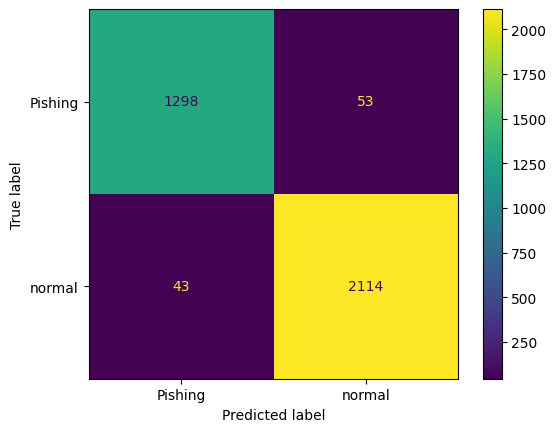

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_gru = confusion_matrix(y_test,y_pred_gru)
ax_gru = ConfusionMatrixDisplay(confusion_matrix=cnf_gru,display_labels=['Pishing','normal'])
ax_gru.plot()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import re

# Load and clean the data
df = pd.read_csv("/content/Phishing_Email.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna().drop_duplicates()

# Label encode the email type
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type'])

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)                 # Remove hyperlinks
    text = re.sub(r'[^\w\s]', '', text)                 # Remove punctuation
    text = text.lower()                                 # Lowercase
    text = re.sub(r'\s+', ' ', text).strip()            # Remove extra spaces
    return text

# Apply preprocessing
df["Email Text"] = df["Email Text"].apply(preprocess_text)

# Feature extraction
tf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tf.fit_transform(df['Email Text']).toarray()
y = np.array(df['Email Type'])

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction function
def predict_text(input_text):
    processed = preprocess_text(input_text)
    vectorized = tf.transform([processed])
    prediction = model.predict(vectorized)
    return "spam" if prediction[0] == 0 else "not spam"

# --- Sample Testing Below ---

# List of sample inputs
sample_emails = [
    "Thanks for subscribing to our monthly newsletter! You'll now receive updates on our latest features, blog posts, and offers.",
    "Please find attached your pending invoice. Kindly clear the payment at the earliest to avoid penalties. [Click here to pay]",
    "Congratulations! You've won a free iPhone. Click here to claim now.",
    "Reminder: Project deadline is next Monday. Let me know if you need help."
]

# Test predictions
for i, email in enumerate(sample_emails, 1):
    result = predict_text(email)
    print(f"Email {i}: {result}\n→ {email}\n")


Email 1: not spam
→ Thanks for subscribing to our monthly newsletter! You'll now receive updates on our latest features, blog posts, and offers.

Email 2: spam
→ Please find attached your pending invoice. Kindly clear the payment at the earliest to avoid penalties. [Click here to pay]

Email 3: spam
→ Congratulations! You've won a free iPhone. Click here to claim now.

Email 4: not spam
→ Reminder: Project deadline is next Monday. Let me know if you need help.

